In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

# Reading in Population by County - 2020

In [2]:
county_pop = pd.read_csv('../data/pop_county.csv')
county_pop.head()

,CTYNAME,pop2020,GrowthRate
0,"Shelby, County",935346,0.7430
1,"Davidson, County",699749,11.4688
2,"Knox, County",474003,9.4829
3,"Hamilton, County",370594,9.8965
4,"Rutherford, County",341316,29.4325


In [3]:
county_pop = county_pop[['CTYNAME', 'pop2020']]
county_pop.head()

,CTYNAME,pop2020
0,"Shelby, County",935346
1,"Davidson, County",699749
2,"Knox, County",474003
3,"Hamilton, County",370594
4,"Rutherford, County",341316


In [4]:
county_pop.columns = ['county', 'population']
county_pop.head()

,county,population
0,"Shelby, County",935346
1,"Davidson, County",699749
2,"Knox, County",474003
3,"Hamilton, County",370594
4,"Rutherford, County",341316


In [5]:
county_pop['county'] = county_pop['county'].str.split(',').apply(lambda x: str(x[0]))
county_pop.head()

,county,population
0,Shelby,935346
1,Davidson,699749
2,Knox,474003
3,Hamilton,370594
4,Rutherford,341316


In [6]:
county_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      95 non-null     object
 1   population  95 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [7]:
county_pop.shape

(95, 2)

# Reading in Income Per Capita by County - 2016

In [8]:
ipc_county = pd.read_csv('../data/income_pc_county.csv')
ipc_county.head()

,Year,County,Value,LastReportedDate
0,2011,Anderson,35932.0,10/23/2018
1,2011,Bedford,29258.0,10/23/2018
2,2011,Benton,30373.0,10/23/2018
3,2011,Bledsoe,20002.0,10/23/2018
4,2011,Blount,33636.0,10/23/2018


In [9]:
ipc_county = ipc_county [['Year', 'County', 'Value']]
ipc_county.head()

,Year,County,Value
0,2011,Anderson,35932.0
1,2011,Bedford,29258.0
2,2011,Benton,30373.0
3,2011,Bledsoe,20002.0
4,2011,Blount,33636.0


In [10]:
ipc_county.columns = ['year', 'county', 'income']
ipc_county.head()

,year,county,income
0,2011,Anderson,35932.0
1,2011,Bedford,29258.0
2,2011,Benton,30373.0
3,2011,Bledsoe,20002.0
4,2011,Blount,33636.0


In [11]:
ipc_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    576 non-null    object 
 1   county  575 non-null    object 
 2   income  575 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.6+ KB


In [12]:
ipc_county.shape

(576, 3)

In [13]:
ipc_county = ipc_county.loc[ipc_county['year'].isin(["2016"])]
print(ipc_county.head())
print('---------')
print(ipc_county['year'].value_counts())

     year    county   income
480  2016  Anderson  39225.0
481  2016   Bedford  34069.0
482  2016    Benton  34013.0
483  2016   Bledsoe  20353.0
484  2016    Blount  39226.0
---------
2016    95
Name: year, dtype: int64


# Reading in Traffic Volume Data - 2018

In [14]:
traffic_volume_county = pd.read_csv('../data/traffic_data_county.csv')
traffic_volume_county.head()

,OBJECTID,Station ID,Station Number,County,Location,Route Number,2018,2017,2016,2015,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,523,5000001,1,Benton,NEAR HENRY CO LINE,895,64,103.0,152.0,149.0,...,60.0,130.0,140.0,122.0,145.0,123.0,141.0,NaN,NaN,NaN
1,524,7000001,1,Bledsoe,NORTH OF BELLVIEW,SR101,1622,1486.0,1617.0,1408.0,...,1104.0,787.0,878.0,960.0,1074.0,818.0,762.0,672.0,NaN,NaN
2,525,9000001,1,Blount,NEAR SEVIER COUNTY LINE,1275,5704,4238.0,3771.0,3589.0,...,2150.0,2190.0,1920.0,2201.0,2004.0,1733.0,1356.0,1584.0,NaN,NaN
3,526,11000001,1,Bradley,N OF EUREKA E OF MEIGS CO LINE,SR306,3478,2458.0,2654.0,2670.0,...,1423.0,1372.0,1606.0,1458.0,1381.0,1262.0,1205.0,1128.0,NaN,NaN
4,527,13000001,1,Campbell,SOUTHWEST JELLICO,SR297,2956,3222.0,3035.0,2858.0,...,3200.0,3245.0,3332.0,3650.0,3197.0,3454.0,2841.0,2794.0,NaN,NaN


In [15]:
traffic_volume_county.columns

Index(['OBJECTID', 'Station ID', 'Station Number', 'County', 'Location',
       'Route Number', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994',
       '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985',
       '1984', '1983'],
      dtype='object')

In [16]:
traffic_volume_county = traffic_volume_county[['Station ID', 'County', 'Location', '2018']]
traffic_volume_county.head()

,Station ID,County,Location,2018
0,5000001,Benton,NEAR HENRY CO LINE,64
1,7000001,Bledsoe,NORTH OF BELLVIEW,1622
2,9000001,Blount,NEAR SEVIER COUNTY LINE,5704
3,11000001,Bradley,N OF EUREKA E OF MEIGS CO LINE,3478
4,13000001,Campbell,SOUTHWEST JELLICO,2956


In [17]:
traffic_volume_county.columns = ['station_id', 'county', 'location', 'tv_2018']
traffic_volume_county.head()

,station_id,county,location,tv_2018
0,5000001,Benton,NEAR HENRY CO LINE,64
1,7000001,Bledsoe,NORTH OF BELLVIEW,1622
2,9000001,Blount,NEAR SEVIER COUNTY LINE,5704
3,11000001,Bradley,N OF EUREKA E OF MEIGS CO LINE,3478
4,13000001,Campbell,SOUTHWEST JELLICO,2956


In [18]:
traffic_volume_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11176 entries, 0 to 11175
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   station_id  11176 non-null  int64 
 1   county      11176 non-null  object
 2   location    11167 non-null  object
 3   tv_2018     11176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 349.4+ KB


In [19]:
traffic_volume_county.head

<bound method NDFrame.head of        station_id    county                                  location  tv_2018
0         5000001    Benton                        NEAR HENRY CO LINE       64
1         7000001   Bledsoe                         NORTH OF BELLVIEW     1622
2         9000001    Blount                   NEAR SEVIER COUNTY LINE     5704
3        11000001   Bradley            N OF EUREKA E OF MEIGS CO LINE     3478
4        13000001  Campbell                         SOUTHWEST JELLICO     2956
...           ...       ...                                       ...      ...
11171   157001048    Shelby       BEVERLE RIVIERA RD.-W OF CANADA RD.     3485
11172   157001049    Shelby     MILTON WILSON BLVD - E OF AIRLINE RD.    14466
11173   157001050    Shelby  DONELSON FARMS PKWY. - W. OF AIRLINE RD.      938
11174   157001051    Shelby                              S. OF SR-193     9391
11175   157001055    Shelby        FLETCHER TRACE PKWY. - N. OF SR-15     2025

[11176 rows x 4 colum

In [20]:
traffic_volume_grouped = traffic_volume_county.groupby(['county']).agg({'tv_2018': "sum"}).reset_index()
traffic_volume_county.shape

(11176, 4)

In [21]:
traffic_volume_grouped.head()

,county,tv_2018
0,Anderson,1002631
1,Bedford,492738
2,Benton,205242
3,Bledsoe,54175
4,Blount,1710630


# Reading in Spatial Data

In [22]:
tv_2019 = pd.read_csv('../data/tv_2019_geo.csv')
tv_2019.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude
0,1000005,CC,395.0,2019.0,36.126099,-84.416817
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704


In [23]:
tv_shape = gpd.read_file('../data/shapefile/Traffic_station_data_2019.shp')
tv_shape.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry
0,01000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610)
1,01000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107)
2,01000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814)
3,01000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858)
4,01000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498)


In [24]:
tv_shape.shape

(12403, 7)

In [25]:
tv_2019.shape

(12403, 6)

In [26]:
counties = gpd.read_file('../data/tn_counties.json')
counties.head()

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
1,None,47,119,01639772,0500000US47119,47119,Maury,06,1588021146,6319196,"POLYGON ((-87.33831 35.65954, -87.25526 35.700..."
2,None,47,177,01639796,0500000US47177,47177,Warren,06,1120635693,3508325,"POLYGON ((-85.88579 35.83899, -85.86812 35.845..."
3,None,47,147,01639786,0500000US47147,47147,Robertson,06,1233581423,451691,"POLYGON ((-87.11566 36.64403, -87.06088 36.645..."
4,None,47,067,01648577,0500000US47067,47067,Hancock,06,575820509,2984310,"POLYGON ((-83.47199 36.59917, -83.27585 36.597..."


In [27]:
counties.shape

(95, 11)

<AxesSubplot:>

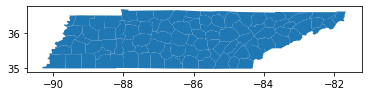

In [28]:
counties.plot()

In [29]:
tv_2019['geometry'] = tv_2019.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
tv_2019.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41681700000001 36.126099)
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137299999999 36.191066)
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.162139 36.218138)
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.155918 36.22858400000001)
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.152704 36.214983)


In [30]:
tv_geo = gpd.GeoDataFrame(tv_2019, 
                           crs = counties.crs, 
                           geometry = tv_2019['geometry'])

In [31]:
counties = counties[['NAME', 'geometry']]
counties.columns = ['county', 'geometry']
counties.head()

,county,geometry
0,Bedford,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
1,Maury,"POLYGON ((-87.33831 35.65954, -87.25526 35.700..."
2,Warren,"POLYGON ((-85.88579 35.83899, -85.86812 35.845..."
3,Robertson,"POLYGON ((-87.11566 36.64403, -87.06088 36.645..."
4,Hancock,"POLYGON ((-83.47199 36.59917, -83.27585 36.597..."


In [32]:
tv_by_county = gpd.sjoin(tv_geo, counties, op = 'within')
tv_by_county.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry,index_right,county
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610),72,Anderson
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107),72,Anderson
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814),72,Anderson
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858),72,Anderson
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498),72,Anderson


In [33]:
tv_by_county['index_right'].value_counts()

34    923
54    551
48    529
21    457
43    274
     ... 
8      34
68     33
46     33
80     33
4      30
Name: index_right, Length: 95, dtype: int64

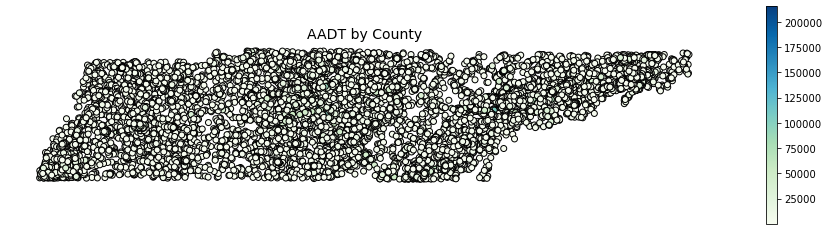

In [34]:
fig, ax = plt.subplots(figsize=(16,4))
tv_by_county.plot(column = 'AADT', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('AADT by County', fontsize = 14)
ax.axis('off');

In [35]:
traffic_volume_grouped = traffic_volume_county.groupby(['county']).agg({'tv_2018': "sum"}).reset_index()
traffic_volume_county.shape

(11176, 4)

In [36]:
tv_by_county

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry,index_right,county
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610),72,Anderson
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107),72,Anderson
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814),72,Anderson
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858),72,Anderson
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498),72,Anderson
...,...,...,...,...,...,...,...,...,...
11977,93000109,CC,2724.0,2019.0,35.967590,-85.485679,POINT (-85.48568 35.96759),23,White
11978,93000110,CC,700.0,2019.0,35.920419,-85.502548,POINT (-85.50255 35.92042),23,White
11979,93000111,CC,2631.0,2019.0,35.926932,-85.463628,POINT (-85.46363 35.92693),23,White
11980,93000112,CC,500.0,2019.0,35.952728,-85.480262,POINT (-85.48026 35.95273),23,White


In [37]:
tv_by_county_grouped = tv_by_county[['AADT', 'county']]

In [38]:
tv_by_county_grouped.head()

,AADT,county
0,395.0,Anderson
1,1916.0,Anderson
2,3519.0,Anderson
3,2348.0,Anderson
4,8840.0,Anderson


In [39]:
tv_by_county.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry,index_right,county
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610),72,Anderson
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107),72,Anderson
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814),72,Anderson
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858),72,Anderson
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498),72,Anderson


In [40]:
tv_by_county_grouped = tv_by_county_grouped.groupby(['county']).agg({'AADT': "sum"}).reset_index()
tv_by_county_grouped.shape

(95, 2)

In [41]:
tv_by_county_grouped.head()

,county,AADT
0,Anderson,902437.0
1,Bedford,485213.0
2,Benton,192817.0
3,Bledsoe,57859.0
4,Blount,1698730.0


In [42]:
tv_by_county_grouped = pd.merge(left = counties, right = tv_by_county_grouped, 
                    left_on = 'county', right_on = 'county',
                               how='inner')
tv_by_county_grouped.shape

(95, 3)

In [43]:
tv_by_county_grouped.head()

,county,geometry,AADT
0,Bedford,"POLYGON ((-86.63855 35.68695, -86.54313 35.698...",485213.0
1,Maury,"POLYGON ((-87.33831 35.65954, -87.25526 35.700...",1372973.0
2,Warren,"POLYGON ((-85.88579 35.83899, -85.86812 35.845...",525971.0
3,Robertson,"POLYGON ((-87.11566 36.64403, -87.06088 36.645...",912318.0
4,Hancock,"POLYGON ((-83.47199 36.59917, -83.27585 36.597...",23224.0


In [44]:
tv_by_county_grouped = pd.merge(tv_by_county_grouped, county_pop,
                               left_on='county', right_on='county',
                               how='inner')
tv_by_county_grouped.shape

(95, 4)

In [45]:
tv_by_county_grouped.head()

,county,geometry,AADT,population
0,Bedford,"POLYGON ((-86.63855 35.68695, -86.54313 35.698...",485213.0,50838
1,Maury,"POLYGON ((-87.33831 35.65954, -87.25526 35.700...",1372973.0,98580
2,Warren,"POLYGON ((-85.88579 35.83899, -85.86812 35.845...",525971.0,41254
3,Robertson,"POLYGON ((-87.11566 36.64403, -87.06088 36.645...",912318.0,72728
4,Hancock,"POLYGON ((-83.47199 36.59917, -83.27585 36.597...",23224.0,6479


In [46]:
tv_by_county_grouped['normalized_score'] = (tv_by_county_grouped['AADT']/tv_by_county_grouped['population'])
tv_by_county_grouped.head()

,county,geometry,AADT,population,normalized_score
0,Bedford,"POLYGON ((-86.63855 35.68695, -86.54313 35.698...",485213.0,50838,9.544298
1,Maury,"POLYGON ((-87.33831 35.65954, -87.25526 35.700...",1372973.0,98580,13.927501
2,Warren,"POLYGON ((-85.88579 35.83899, -85.86812 35.845...",525971.0,41254,12.749576
3,Robertson,"POLYGON ((-87.11566 36.64403, -87.06088 36.645...",912318.0,72728,12.544247
4,Hancock,"POLYGON ((-83.47199 36.59917, -83.27585 36.597...",23224.0,6479,3.584504


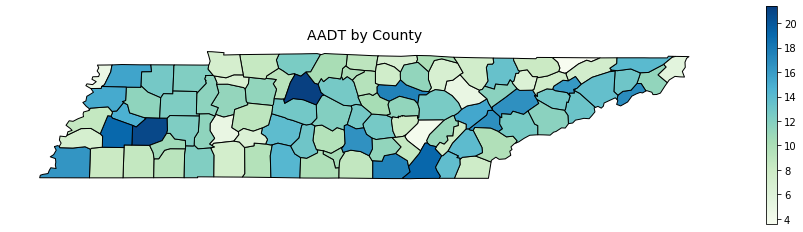

In [47]:
fig, ax = plt.subplots(figsize=(16,4))
tv_by_county_grouped.plot(column = 'normalized_score', #traffic volume divided by population
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('AADT by County', fontsize = 14)
ax.axis('off');

In [48]:
ipc_county = pd.merge(ipc_county, counties,
                     left_on='county', right_on='county',
                     how='inner')
ipc_county.shape

(95, 4)

In [62]:
ipc_county.head()

,year,county,income,geometry
0,2016,Anderson,39225.0,"POLYGON ((-84.44034 36.16300, -84.40323 36.174..."
1,2016,Bedford,34069.0,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
2,2016,Benton,34013.0,"POLYGON ((-88.21300 36.11938, -88.08577 36.253..."
3,2016,Bledsoe,20353.0,"POLYGON ((-85.42459 35.56732, -85.26555 35.721..."
4,2016,Blount,39226.0,"POLYGON ((-84.16645 35.80534, -84.14347 35.796..."


In [49]:
pd.set_option('display.max_rows', 500)

In [50]:
ipc_county = gpd.GeoDataFrame(ipc_county)

In [64]:
mean = ipc_county['income'].mean()
print(mean)

35409.55789473684


In [65]:
std = ipc_county['income'].std()
print(std)

8094.852817864518


In [66]:
ipc_county['normalized_score'] = (ipc_county['income'] - mean)/std
ipc_county.head()

,year,county,income,geometry,normalized_score
0,2016,Anderson,39225.0,"POLYGON ((-84.44034 36.16300, -84.40323 36.174...",0.471342
1,2016,Bedford,34069.0,"POLYGON ((-86.63855 35.68695, -86.54313 35.698...",-0.165606
2,2016,Benton,34013.0,"POLYGON ((-88.21300 36.11938, -88.08577 36.253...",-0.172524
3,2016,Bledsoe,20353.0,"POLYGON ((-85.42459 35.56732, -85.26555 35.721...",-1.860016
4,2016,Blount,39226.0,"POLYGON ((-84.16645 35.80534, -84.14347 35.796...",0.471465


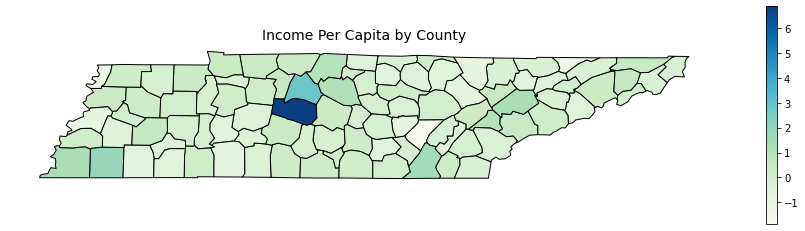

In [67]:
fig, ax = plt.subplots(figsize=(16,4))
ipc_county.plot(column = 'normalized_score', #zscore
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Income Per Capita by County', fontsize = 14)
ax.axis('off');

# Reading in Segmented Road Files - Excluding from Analysis

In [52]:
functional = gpd.read_file('../data/shapefile_segmented/Functional_Routes_Traffic_Segment_data.shp')
functional.head(5)
#Seems to be residential roads, will most likely exclude

,MSLINK,BLM,ELM,ID_NUMBER,NBR_TENN_C,NBR_RT2,RTE_NME,SPCL_CSE,CNTY_SEQ,YR_TRFC,...,VHCL_PASS_,VHCL_SU_TR,VHCL_MU_TR,STA_NBR,ACTL_CNT,CLASS_CNTY,CLASS_NB2,IS_CLASS_C,ID_NUMBE2,geometry
0,1.0,0.000,0.020,0101230001,ANDERSON,01230,SPRING ST.,0-NONE,1,2019,...,98.0,2.0,0.0,1 @,73,73,139C,NO,0101230001,"LINESTRING (2459162.749 627193.894, 2459230.70..."
1,2.0,0.000,1.373,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,96.0,3.0,1.0,47,1,1,047C,YES,0101264001,"LINESTRING (2523126.922 634225.620, 2523945.59..."
2,3.0,1.373,2.535,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,96.0,3.0,1.0,47,1,1,047C,YES,0101264001,"LINESTRING (2528322.800 639210.442, 2528411.28..."
3,4.0,2.535,2.600,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,96.0,3.0,1.0,47,1,1,047C,YES,0101264001,"LINESTRING (2533069.696 643003.859, 2533354.36..."
4,5.0,2.600,8.430,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,98.0,1.0,1.0,173,1,1,029C,NO,0101264001,"LINESTRING (2533354.366 643188.829, 2533718.33..."


In [53]:
functional.columns

Index(['MSLINK', 'BLM', 'ELM', 'ID_NUMBER', 'NBR_TENN_C', 'NBR_RT2', 'RTE_NME',
       'SPCL_CSE', 'CNTY_SEQ', 'YR_TRFC', 'AADT', 'DHV_PCT', 'PCT_PEAK_H',
       'DRCT_DISTR', 'VHCL_PASS_', 'VHCL_SU_TR', 'VHCL_MU_TR', 'STA_NBR',
       'ACTL_CNT', 'CLASS_CNTY', 'CLASS_NB2', 'IS_CLASS_C', 'ID_NUMBE2',
       'geometry'],
      dtype='object')

In [54]:
local = gpd.read_file('../data/shapefile_segmented/Local_Routes_Traffic_Segment_data.shp')
local.head(10)
#Seems to be residential roads, will most likely exclude

,MSLINK,BLM,ELM,ID_NUMBER,NBR_TENN_C,NBR_RT2,RTE_NME,SPCL_CSE,CNTY_SEQ,YR_TRFC,...,VHCL_PASS_,VHCL_SU_TR,VHCL_MU_TR,STA_NBR,ACTL_CNT,CLASS_CNTY,CLASS_NB2,IS_CLASS_C,ID_NUMBE2,geometry
0,1.0,0.000,0.510,010B158001,ANDERSON,0B158,WILTSHIRE DR.,0-NONE,1,2019,...,99.0,1.0,0.0,117,1,1.0,117C,YES,010B158001,"LINESTRING (2472747.922 609675.769, 2472464.37..."
1,2.0,0.000,2.001,010E527001,ANDERSON,0E527,BETHEL VALLEY RD.,0-NONE,1,2019,...,97.0,2.0,1.0,82,1,NaN,--,--,010E527001,"LINESTRING (2485819.069 599107.136, 2487439.11..."
2,3.0,0.000,0.280,010E528001,ANDERSON,0E528,E. DIVISION RD.,0-NONE,1,2019,...,97.0,2.0,1.0,182,1,NaN,--,--,010E528001,"LINESTRING (2488726.614 618735.429, 2488637.51..."
3,4.0,0.000,0.147,010E529001,ANDERSON,0E529,FLORIDA AVE.,0-NONE,1,2019,...,97.0,2.0,1.0,189,1,NaN,--,--,010E529001,"LINESTRING (2491873.609 622625.348, 2491720.06..."
4,5.0,0.000,0.286,020A681001,BEDFORD,0A681,MORTON ST.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1829980.941 423772.391, 1829982.27..."
5,6.0,0.286,0.367,020A681001,BEDFORD,0A681,NASHVILLE DIRT RD.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1829841.752 425236.332, 1829788.70..."
6,7.0,0.367,3.056,020A681001,BEDFORD,0A681,NASHVILLE DIRT RD.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1829741.581 425578.241, 1829596.66..."
7,8.0,3.056,5.590,020A681001,BEDFORD,0A681,NASHVILLE DIRT RD.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1825775.422 438504.698, 1824584.21..."
8,9.0,0.000,0.109,020A811001,BEDFORD,0A811,W. HOLLAND ST.,0-NONE,1,2019,...,91.0,4.0,5.0,133,2,NaN,--,--,020A811001,"LINESTRING (1831249.823 419011.094, 1831116.09..."
9,10.0,0.000,0.264,050A470001,BLOUNT,0A470,CHELTENHAM RD.,0-NONE,1,2019,...,98.0,1.0,1.0,152,5,5.0,129C,NO,050A470001,"LINESTRING (2577107.139 530142.799, 2577187.38..."


In [55]:
state = gpd.read_file('../data/shapefile_segmented/State_Route_Traffic_Segment_data.shp')
state.head()

,MSLINK,BLM,ELM,ID_NUMBER,NBR_TENN_C,NBR_RT2,RTE_NME,SPCL_CSE,CNTY_SEQ,YR_TRFC,...,VHCL_PASS_,VHCL_SU_TR,VHCL_MU_TR,STA_NBR,ACTL_CNT,CLASS_CNTY,CLASS_NB2,IS_CLASS_C,ID_NUMBE2,geometry
0,1.0,0.000,0.527,01SR009001,ANDERSON,SR009,MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,111,1,1,036C,--,01SR009001,"LINESTRING (2511000.011 696791.700, 2511027.89..."
1,2.0,0.527,0.930,01SR009001,ANDERSON,SR009,MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,111,1,1,036C,--,01SR009001,"LINESTRING (2512072.841 694271.147, 2512190.30..."
2,3.0,0.930,1.700,01SR009001,ANDERSON,SR009,S. MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,11,1,1,036C,--,01SR009001,"LINESTRING (2512096.730 692266.463, 2512258.42..."
3,4.0,1.700,1.951,01SR009001,ANDERSON,SR009,S. MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,14,1,1,036C,--,01SR009001,"LINESTRING (2514116.200 688770.187, 2514288.31..."
4,5.0,1.951,4.779,01SR009001,ANDERSON,SR009,US-HWY. 25W,0-NONE,1,2019,...,98.0,1.0,1.0,14,1,1,036C,--,01SR009001,"LINESTRING (2514918.696 687698.875, 2515350.01..."
